In [3]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

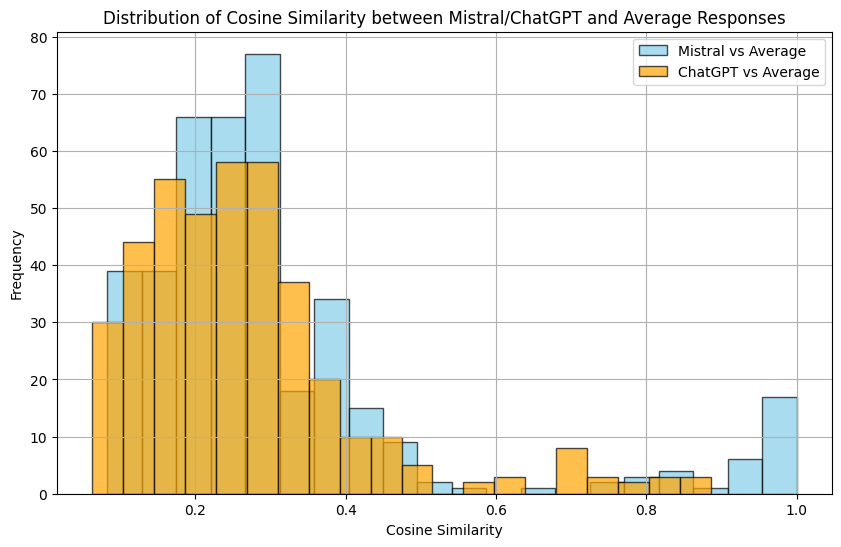

In [5]:
def generate_average_response(mistral_response, chatgpt_response):
    # Tokenize responses
    mistral_tokens = mistral_response.split()
    chatgpt_tokens = chatgpt_response.split()
    
    # Calculating average length
    avg_length = (len(mistral_tokens) + len(chatgpt_tokens)) // 2
    
    # Take the first half of Mistral response and the second half of ChatGPT response
    avg_response = mistral_tokens[:avg_length] + chatgpt_tokens[avg_length:]
    
    return ' '.join(avg_response)

# Load JSON data from all files
json_files = ['1.json', '2.json', '3.json', '4.json', '5.json', '6.json', '7.json', '8.json', '9.json', '10.json', '11.json', '12.json', '13.json', '14.json', '15.json', '16.json', '17.json', '18.json', '19.json', '20.json']
data = []

for file in json_files:
    with open('/YourDirectoryToJSONFILE/GeneratedJsonFiles/'+file, 'r') as f:
        json_data = json.load(f)
        for i in range(len(json_data['question'])):
            data.append({
                'question': json_data['question'][str(i)],
                'mistral_response': json_data['mistral_response'][str(i)],
                'chatgpt_response': json_data['chatgpt_response'][str(i)]
            })

df = pd.DataFrame(data)

# Ensuring all columns exist
expected_columns = ['question', 'mistral_response', 'chatgpt_response']
for col in expected_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the DataFrame.")

# Generate average response from Mistral and ChatGPT responses
df['average_response'] = df.apply(lambda row: generate_average_response(row['mistral_response'], row['chatgpt_response']), axis=1)

# Computing cosine similarity between Mistral and average responses
vectorizer = TfidfVectorizer()
mistral_vectors = vectorizer.fit_transform(df['mistral_response'])
average_vectors = vectorizer.transform(df['average_response'])
cosine_similarities_mistral = cosine_similarity(mistral_vectors, average_vectors)

# Computing cosine similarity between ChatGPT and average responses
chatgpt_vectors = vectorizer.transform(df['chatgpt_response'])  # Use transform instead of fit_transform
cosine_similarities_chatgpt = cosine_similarity(chatgpt_vectors, average_vectors)

# Plotting
plt.figure(figsize=(10, 6), label='Mistral/ChatGPT')

plt.hist(cosine_similarities_mistral.flatten(), bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Mistral vs Average')
plt.hist(cosine_similarities_chatgpt.flatten(), bins=20, color='orange', edgecolor='black', alpha=0.7, label='ChatGPT vs Average')

plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarity between Mistral/ChatGPT and Average Responses')
plt.legend()
plt.grid(True)
plt.show()
